# CP321 - Final Project - duration of unemployment


Our dataset contains information based on duration of unemployment. the data has the age groups ranging from (15+,15-64, 15-19, 20-24, 25-44, 45-54, 55-64 and 65+), the duration of unemployment includes (1-4 weeks, 5-13 weeks, 14-25 weeks, 26 weeks, 27 weeks+, 27-51 weeks, 52 weeks, 53 weeks+, duration unknown and average weeks unemployed). the date range starts 2006-03-01 and ends 2020-09-30.
The dataset is downloaded from: https://data.ontario.ca/en/dataset/duration-of-unemployment

In this project we will be following the ASSERT Model.


### Ask a Question 
as a new graduates or any citizen living in this country, we would like to know if age or sex have an impact on the duration of the employment. the information on the length of time that individuals in Ontario are typically unemployed, as well as how this has changed over time. Overall, the duration of unemployment data is a key resource for anyone interested in understanding the state of employment and unemployment in Ontario.



### Search for Informtation
we visualize the data in a manner where trends of both the variables, sex and age group, can be correlated to their duration of employment. 




### Structure the Data
For structuring the Data, we had to filter the data to the most recent year (2020) added within the file. Also, we filtered it so the Geography would just show total Ontario region Average itself, instead of manually going through each part of the region and manually calculating it for each duration and other information.




### Envision the Answer 
Regarding visualizing the solution, we can use our existing information wisely to imagine methods of responding to the inquiry. By narrowing down the data to only examine the most recent year, which happens to be 2020, we aim to assess and arrive at a decision about which gender, based on their age, is likely to have longest duration of unemplyment. However, in addition to this factor, we will also take into consideration the region where they reside and any other minor details that could have an impact.


### Represent the Visualization
The data reveals that the majority of unemployed individuals in Ontario in 2020 were unemployed for less than 4 weeks, with the highest proportion of individuals falling in the 1-2 week duration category. However, a significant number of individuals also experienced longer-term unemployment, with a non-negligible proportion being unemployed for over 52 weeks.


### Tell a Story
To sum up the analysis, it is clear from the data that age and gender do not necessarily lead to high duration of unemployment, as there are some individuals who has less duration of unemolyment without being effect from age.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#import seaborn as sns

# Reading file 
data = pd.read_csv('data/mltsd_v0906_18_tab2qq.csv')
# Filtering the data to the most recent year (2020) added within the File.
dataFrame = data[(data['GEOGRAPHY'] == 'Total, Ontario regions') & (data['MONTH'].str.contains('2020'))]

# Grouping 
edit = dataFrame.groupby(['DURATION']).mean().reset_index().sort_values('Both sexes', ascending=True)

#education_groupdf = pd.read_csv('data/mltsd_v0906_18_tab2qq.csv')

edit

/var/folders/rv/ytfx52d11xb98pwmw7g2yshr0000gn/T/ipykernel_2276/955304862.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit = dataFrame.groupby(['DURATION']).mean().reset_index().sort_values('Both sexes', ascending=True)


,DURATION,Both sexes,Male,Female
5,26 weeks,2.720833,1.445833,0.829167
1,52 weeks,6.320833,3.079167,2.745833
2,53 weeks or more,6.758333,3.750000,2.779167
8,Duration unknown,8.137500,3.291667,4.337500
10,Average weeks unemployed (top-code = 99 weeks),13.670833,14.604167,12.683333
9,Average weeks unemployed (no top-code),14.725000,16.208333,13.087500
0,27 - 51 weeks,16.225000,10.325000,5.716667
6,27 weeks or more,29.691667,17.695833,11.791667
4,14 - 25 weeks,54.600000,27.350000,27.258333
7,5 - 13 weeks,94.083333,46.537500,47.537500


/var/folders/rv/ytfx52d11xb98pwmw7g2yshr0000gn/T/ipykernel_2276/1747247644.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit = dataFrame.groupby(['DURATION']).mean().reset_index().sort_values('Both sexes', ascending=True)


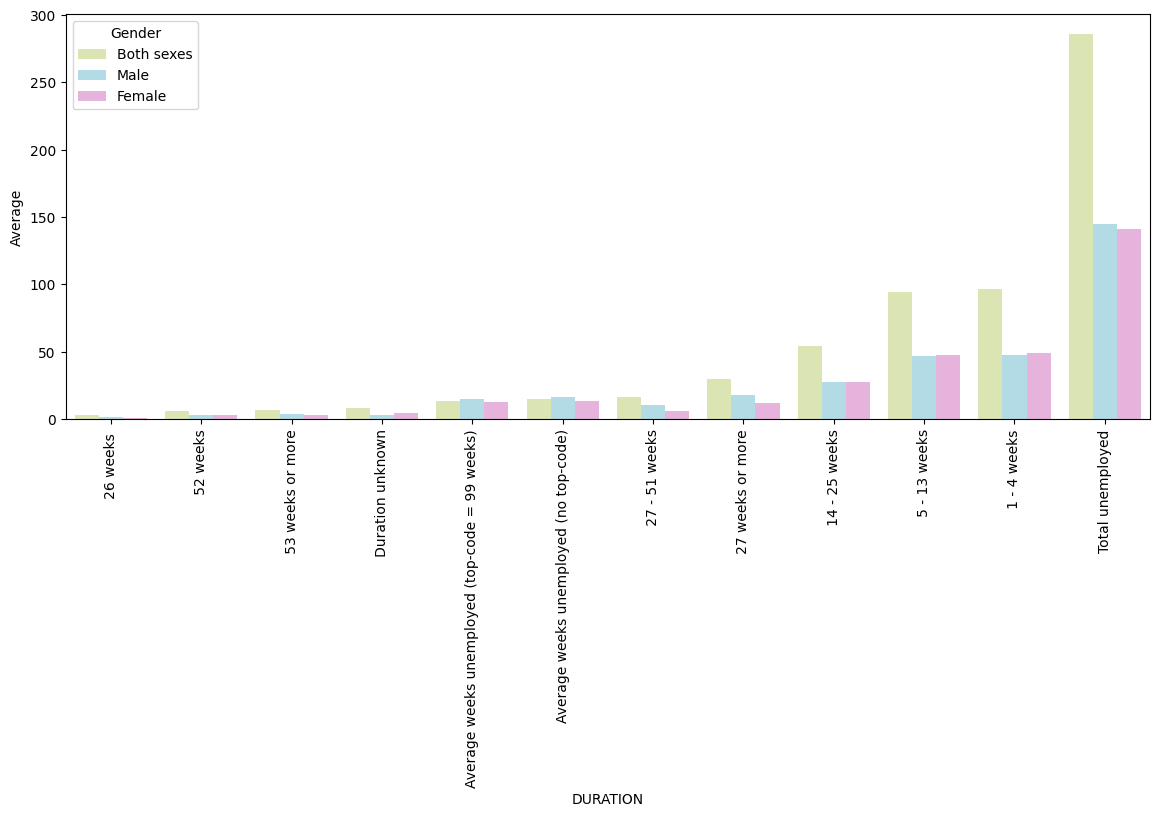

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading file 
data = pd.read_csv('data/mltsd_v0906_18_tab2qq.csv')
# Filtering the data to the most recent year (2020) added within the File.
dataFrame = data[(data['GEOGRAPHY'] == 'Total, Ontario regions') & (data['MONTH'].str.contains('2020'))]

# Grouping.
edit = dataFrame.groupby(['DURATION']).mean().reset_index().sort_values('Both sexes', ascending=True)
df_to_plot = pd.melt(edit, id_vars=['DURATION'], value_vars=['Both sexes', 'Male', 'Female'], var_name= 'Gender', value_name='Average')

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
# Using a colour palette to make it look aesthetically pleasing
current_palette = sns.hls_palette(n_colors=3, h=0.2, l=0.8, s=0.65)

# Plotting the filtered information itself.
# We used the seaborn package to help us out with our needs.
sns.barplot(x="DURATION", y="Average", hue='Gender', data=df_to_plot, ax=ax, palette=current_palette)
plt.xticks(rotation=90)
plt.tight_layout()


/var/folders/rv/ytfx52d11xb98pwmw7g2yshr0000gn/T/ipykernel_2276/3099366489.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby(['AGE GROUP', 'DURATION']).sum()['Both sexes']


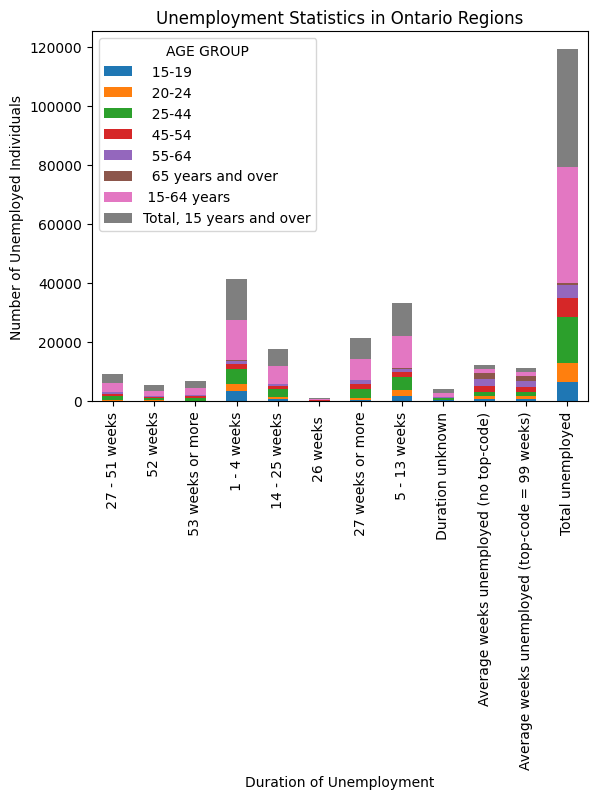

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data from the CSV file
df = pd.read_csv('data/mltsd_v0906_18_tab2qq.csv')

# Filter the data to only include Ontario regions
df = df[df['GEOGRAPHY'] == 'Total, Ontario regions']

# Group the data by age group and duration of unemployment
grouped_df = df.groupby(['AGE GROUP', 'DURATION']).sum()['Both sexes']

# Reshape the data to a pivot table format
pivot_df = grouped_df.reset_index().pivot(index='DURATION', columns='AGE GROUP', values='Both sexes')

# Create a stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# Set the axis labels and title
plt.xlabel('Duration of Unemployment')
plt.ylabel('Number of Unemployed Individuals')
plt.title('Unemployment Statistics in Ontario Regions')

# Show the plot
plt.show()